# Data Loading

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming you have a dataset stored in a CSV file
dataset_path = 'career_pred.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)
df

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,...,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,...,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,...,1,4,3,1,4,3,3,3,4,UI/UX Designer
3,3,4,2,1,1,1,1,1,3,2,...,1,3,2,1,2,1,4,4,3,Technical Support
4,2,3,2,4,1,1,1,4,3,3,...,1,2,1,3,1,5,4,3,1,Data Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,3,2,1,2,1,1,2,2,3,3,...,1,4,2,2,1,4,4,3,3,NaN
7521,2,3,3,3,4,3,2,1,3,3,...,4,2,3,2,4,1,3,3,2,NaN
7522,3,2,1,2,1,1,1,2,2,3,...,1,3,1,1,3,5,3,3,4,NaN
7523,2,1,1,1,2,1,1,2,2,2,...,1,3,2,1,2,4,4,3,4,NaN


# Showing Outliers Indices

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('career_pred.csv')

# Select only the numeric columns (assuming the last column 'ROLE' is non-numeric)
numeric_columns = data.iloc[:, :-1].select_dtypes(include=np.number)

# Calculate the Z-scores for each numeric column
z_scores = np.abs(stats.zscore(numeric_columns))

# Find the indices of outliers
outlier_indices = np.where(z_scores > 3)  # Adjust the threshold as needed

# Print the indices and values of the outliers
for column, indices in zip(numeric_columns.columns, outlier_indices):
    print("Column:", column)
    print("Outlier indices:", indices)
    print("Outlier values:", numeric_columns.iloc[indices])
    print("-----------------------")


Column: sslc
Outlier indices: [   3    4   17 ... 7521 7521 7521]
Outlier values:       sslc  hsc  cgpa  school_type  no_of_miniprojects  no_of_projects  \
3        3    4     2            1                   1               1   
4        2    3     2            4                   1               1   
17       4    4     4            2                   2               1   
22       1    1     2            3                   3               3   
22       1    1     2            3                   3               3   
...    ...  ...   ...          ...                 ...             ...   
7515     3    3     1            2                   2               2   
7521     2    3     3            3                   4               3   
7521     2    3     3            3                   4               3   
7521     2    3     3            3                   4               3   
7521     2    3     3            3                   4               3   

      coresub_skill  aptitude

# Removing Outliers

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('career_pred.csv')

# Select only the numeric columns (assuming the last column 'ROLE' is non-numeric)
numeric_columns = data.iloc[:, :-1].select_dtypes(include=np.number)

# Calculate the Z-scores for each numeric column
z_scores = np.abs(stats.zscore(numeric_columns))

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Create a mask to identify rows with outliers
outlier_mask = (z_scores > threshold).any(axis=1)


# Remove rows with outliers from the DataFrame
filtered_data = data[~outlier_mask]

# Save the filtered data to a new CSV file
filtered_data.to_csv('career_pred_filtered.csv', index=False)
df = filtered_data

filtered_data

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,...,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,...,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,...,1,4,3,1,4,3,3,3,4,UI/UX Designer
5,1,1,1,1,1,1,2,2,3,2,...,1,3,2,1,2,5,3,3,5,Technical Writer
6,3,3,2,2,2,1,2,4,3,3,...,1,3,2,1,1,5,4,4,4,Web Developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,3,3,2,1,2,1,2,1,2,3,...,2,4,3,4,1,4,4,3,5,NaN
7520,3,2,1,2,1,1,2,2,3,3,...,1,4,2,2,1,4,4,3,3,NaN
7522,3,2,1,2,1,1,1,2,2,3,...,1,3,1,1,3,5,3,3,4,NaN
7523,2,1,1,1,2,1,1,2,2,2,...,1,3,2,1,2,4,4,3,4,NaN


# Resetting the Index

In [4]:

import pandas as pd

# Read the filtered data from the CSV file
filtered_data = pd.read_csv('career_pred_filtered.csv')

# Reset the index of the DataFrame
filtered_data.reset_index(drop=True, inplace=True)

# Save the filtered data with updated indexing to a new CSV file
df  = filtered_data.to_csv('career_pred_filtered_indexed.csv', index=True)



# Removing the Unnamed Column

In [5]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('career_pred_filtered_indexed.csv')
data
# Drop the "Unnamed" column
data = data.drop("Unnamed: 0", axis=1)
data

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,...,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,...,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,...,1,4,3,1,4,3,3,3,4,UI/UX Designer
3,1,1,1,1,1,1,2,2,3,2,...,1,3,2,1,2,5,3,3,5,Technical Writer
4,3,3,2,2,2,1,2,4,3,3,...,1,3,2,1,1,5,4,4,4,Web Developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,3,3,2,1,2,1,2,1,2,3,...,2,4,3,4,1,4,4,3,5,NaN
6327,3,2,1,2,1,1,2,2,3,3,...,1,4,2,2,1,4,4,3,3,NaN
6328,3,2,1,2,1,1,1,2,2,3,...,1,3,1,1,3,5,3,3,4,NaN
6329,2,1,1,1,2,1,1,2,2,2,...,1,3,2,1,2,4,4,3,4,NaN


# Merging Two Columns Into One

In [6]:
data['sympos_won_ratio']=data['sympos_won']/data['sympos_attend']
del data['sympos_won']
del data['sympos_attend']

data


,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,ds_coding,technology_used,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE,sympos_won_ratio
0,2,3,2,3,1,1,1,1,2,4,...,1,1,2,2,4,3,4,5,Technical Support,0.333333
1,3,1,2,2,2,1,1,3,2,4,...,2,2,3,2,5,3,3,4,Software Developer,0.666667
2,3,4,2,2,1,1,1,2,3,3,...,1,1,1,4,3,3,3,4,UI/UX Designer,0.750000
3,1,1,1,1,1,1,2,2,3,2,...,2,1,1,2,5,3,3,5,Technical Writer,0.666667
4,3,3,2,2,2,1,2,4,3,3,...,1,1,1,1,5,4,4,4,Web Developer,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,3,3,2,1,2,1,2,1,2,3,...,1,2,4,1,4,4,3,5,NaN,0.750000
6327,3,2,1,2,1,1,2,2,3,3,...,4,1,2,1,4,4,3,3,NaN,0.500000
6328,3,2,1,2,1,1,1,2,2,3,...,2,1,1,3,5,3,3,4,NaN,0.333333
6329,2,1,1,1,2,1,1,2,2,2,...,2,1,1,2,4,4,3,4,NaN,0.666667


In [7]:
data

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,ds_coding,technology_used,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE,sympos_won_ratio
0,2,3,2,3,1,1,1,1,2,4,...,1,1,2,2,4,3,4,5,Technical Support,0.333333
1,3,1,2,2,2,1,1,3,2,4,...,2,2,3,2,5,3,3,4,Software Developer,0.666667
2,3,4,2,2,1,1,1,2,3,3,...,1,1,1,4,3,3,3,4,UI/UX Designer,0.750000
3,1,1,1,1,1,1,2,2,3,2,...,2,1,1,2,5,3,3,5,Technical Writer,0.666667
4,3,3,2,2,2,1,2,4,3,3,...,1,1,1,1,5,4,4,4,Web Developer,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,3,3,2,1,2,1,2,1,2,3,...,1,2,4,1,4,4,3,5,NaN,0.750000
6327,3,2,1,2,1,1,2,2,3,3,...,4,1,2,1,4,4,3,3,NaN,0.500000
6328,3,2,1,2,1,1,1,2,2,3,...,2,1,1,3,5,3,3,4,NaN,0.333333
6329,2,1,1,1,2,1,1,2,2,2,...,2,1,1,2,4,4,3,4,NaN,0.666667


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6331 entries, 0 to 6330
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sslc                  6331 non-null   int64  
 1   hsc                   6331 non-null   int64  
 2   cgpa                  6331 non-null   int64  
 3   school_type           6331 non-null   int64  
 4   no_of_miniprojects    6331 non-null   int64  
 5   no_of_projects        6331 non-null   int64  
 6   coresub_skill         6331 non-null   int64  
 7   aptitude_skill        6331 non-null   int64  
 8   problemsolving_skill  6331 non-null   int64  
 9   programming_skill     6331 non-null   int64  
 10  abstractthink_skill   6331 non-null   int64  
 11  design_skill          6331 non-null   int64  
 12  first_computer        6331 non-null   int64  
 13  first_program         6331 non-null   int64  
 14  lab_programs          6331 non-null   int64  
 15  ds_coding            

# Converting Data into same types

In [9]:
def convert_to_int(remain_df, col_name):
    new_df = remain_df.copy()  # create a copy of the original dataframe
    new_df[col_name] = pd.to_numeric(new_df[col_name], errors='coerce').astype('Int64')  # convert the specified column to int64
    return new_df

df = convert_to_int(data, 'learning_style')
# print(df.dtypes)

data   =df

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6331 entries, 0 to 6330
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sslc                  6331 non-null   int64  
 1   hsc                   6331 non-null   int64  
 2   cgpa                  6331 non-null   int64  
 3   school_type           6331 non-null   int64  
 4   no_of_miniprojects    6331 non-null   int64  
 5   no_of_projects        6331 non-null   int64  
 6   coresub_skill         6331 non-null   int64  
 7   aptitude_skill        6331 non-null   int64  
 8   problemsolving_skill  6331 non-null   int64  
 9   programming_skill     6331 non-null   int64  
 10  abstractthink_skill   6331 non-null   int64  
 11  design_skill          6331 non-null   int64  
 12  first_computer        6331 non-null   int64  
 13  first_program         6331 non-null   int64  
 14  lab_programs          6331 non-null   int64  
 15  ds_coding            

# Heatmap 

C:\Users\Afnan Qasim\AppData\Local\Temp\ipykernel_12716\917667006.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


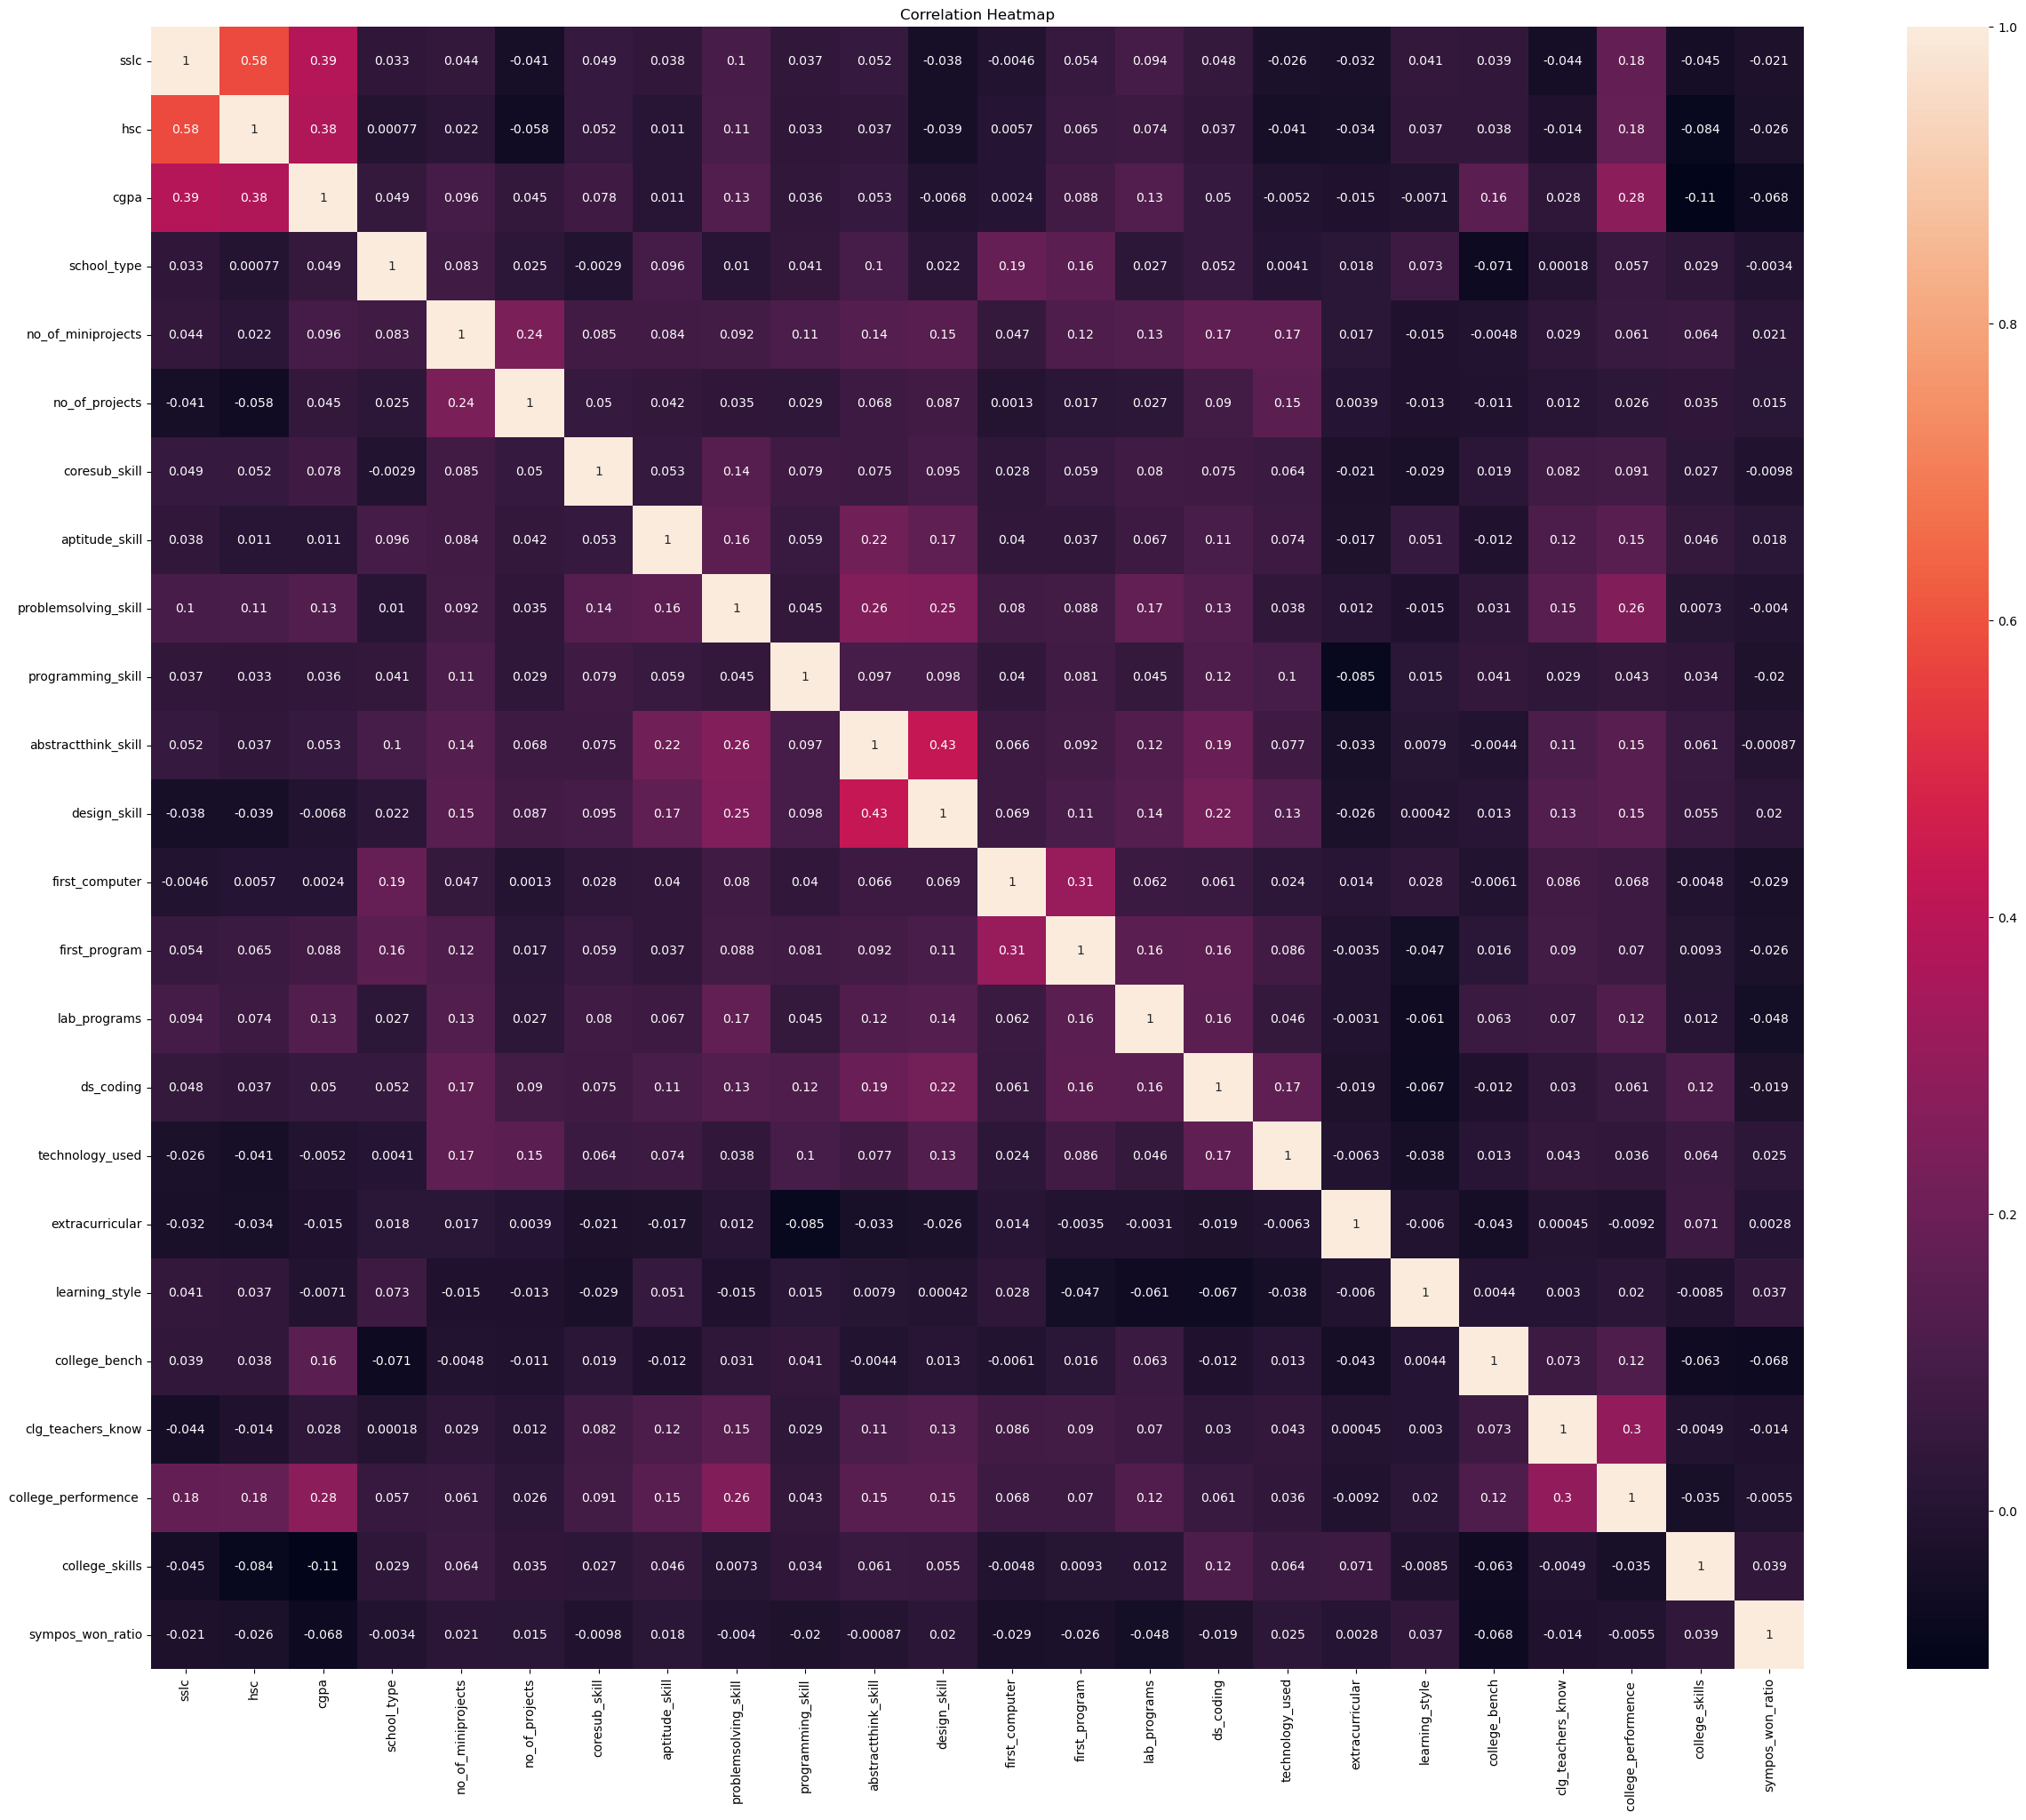

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
#data = pd.read_csv('labeled_data.csv')

plt.figure(figsize=(30,24))
sns.heatmap(data.corr(),annot=True)

'''
# Calculate the correlation matrix
correlation_matrix = data_without_role.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
'''
# Set plot title
plt.title('Correlation Heatmap')


# Show the plot
plt.show()


In [12]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
#data = pd.read_csv('labeled_data.csv')

# Calculate the correlation matrix
correlation_matrix = data.corr().abs()

# Create a boolean mask to identify correlated features
mask = correlation_matrix.mask(np.triu(np.ones(correlation_matrix.shape, dtype=bool)))

# Identify columns to drop based on correlation threshold
columns_to_drop = []
for column in mask.columns:
    correlated_columns = mask[column][mask[column] > 0.4].index.tolist()
    columns_to_drop.extend(correlated_columns)

# Remove duplicates
columns_to_drop = list(set(columns_to_drop))

# Drop the correlated features from the DataFrame
data_filtered = data.drop(columns_to_drop, axis=1)

# Save the filtered data into a new CSV file
data_filtered.to_csv('final.csv', index=False)


C:\Users\Afnan Qasim\AppData\Local\Temp\ipykernel_12716\1582067270.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr().abs()


In [13]:

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('final.csv')
data


,sslc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,abstractthink_skill,...,ds_coding,technology_used,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE,sympos_won_ratio
0,2,2,3,1,1,1,1,2,4,2,...,1,1,2,2.0,4,3,4,5,Technical Support,0.333333
1,3,2,2,2,1,1,3,2,4,3,...,2,2,3,2.0,5,3,3,4,Software Developer,0.666667
2,3,2,2,1,1,1,2,3,3,2,...,1,1,1,4.0,3,3,3,4,UI/UX Designer,0.750000
3,1,1,1,1,1,2,2,3,2,3,...,2,1,1,2.0,5,3,3,5,Technical Writer,0.666667
4,3,2,2,2,1,2,4,3,3,3,...,1,1,1,1.0,5,4,4,4,Web Developer,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,3,2,1,2,1,2,1,2,3,2,...,1,2,4,1.0,4,4,3,5,NaN,0.750000
6327,3,1,2,1,1,2,2,3,3,3,...,4,1,2,1.0,4,4,3,3,NaN,0.500000
6328,3,1,2,1,1,1,2,2,3,1,...,2,1,1,3.0,5,3,3,4,NaN,0.333333
6329,2,1,1,2,1,1,2,2,2,2,...,2,1,1,2.0,4,4,3,4,NaN,0.666667


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6331 entries, 0 to 6330
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sslc                  6331 non-null   int64  
 1   cgpa                  6331 non-null   int64  
 2   school_type           6331 non-null   int64  
 3   no_of_miniprojects    6331 non-null   int64  
 4   no_of_projects        6331 non-null   int64  
 5   coresub_skill         6331 non-null   int64  
 6   aptitude_skill        6331 non-null   int64  
 7   problemsolving_skill  6331 non-null   int64  
 8   programming_skill     6331 non-null   int64  
 9   abstractthink_skill   6331 non-null   int64  
 10  first_computer        6331 non-null   int64  
 11  first_program         6331 non-null   int64  
 12  lab_programs          6331 non-null   int64  
 13  ds_coding             6331 non-null   int64  
 14  technology_used       6331 non-null   int64  
 15  extracurricular      

In [15]:
df = data
df

,sslc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,abstractthink_skill,...,ds_coding,technology_used,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE,sympos_won_ratio
0,2,2,3,1,1,1,1,2,4,2,...,1,1,2,2.0,4,3,4,5,Technical Support,0.333333
1,3,2,2,2,1,1,3,2,4,3,...,2,2,3,2.0,5,3,3,4,Software Developer,0.666667
2,3,2,2,1,1,1,2,3,3,2,...,1,1,1,4.0,3,3,3,4,UI/UX Designer,0.750000
3,1,1,1,1,1,2,2,3,2,3,...,2,1,1,2.0,5,3,3,5,Technical Writer,0.666667
4,3,2,2,2,1,2,4,3,3,3,...,1,1,1,1.0,5,4,4,4,Web Developer,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,3,2,1,2,1,2,1,2,3,2,...,1,2,4,1.0,4,4,3,5,NaN,0.750000
6327,3,1,2,1,1,2,2,3,3,3,...,4,1,2,1.0,4,4,3,3,NaN,0.500000
6328,3,1,2,1,1,1,2,2,3,1,...,2,1,1,3.0,5,3,3,4,NaN,0.333333
6329,2,1,1,2,1,1,2,2,2,2,...,2,1,1,2.0,4,4,3,4,NaN,0.666667


In [35]:
role=df['ROLE']

In [36]:
df = df.drop(["ROLE"],axis=1)

In [37]:
df

,sslc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,abstractthink_skill,...,ds_coding,technology_used,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,sympos_won_ratio,Cluster_h
0,2,2,3,1,1,1,1,2,4,2,...,1,1,2,2.0,4,3,4,5,0.333333,1
1,3,2,2,2,1,1,3,2,4,3,...,2,2,3,2.0,5,3,3,4,0.666667,3
2,3,2,2,1,1,1,2,3,3,2,...,1,1,1,4.0,3,3,3,4,0.750000,2
3,1,1,1,1,1,2,2,3,2,3,...,2,1,1,2.0,5,3,3,5,0.666667,6
4,3,2,2,2,1,2,4,3,3,3,...,1,1,1,1.0,5,4,4,4,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,3,2,1,2,1,2,1,2,3,2,...,1,2,4,1.0,4,4,3,5,0.750000,3
6327,3,1,2,1,1,2,2,3,3,3,...,4,1,2,1.0,4,4,3,3,0.500000,1
6328,3,1,2,1,1,1,2,2,3,1,...,2,1,1,3.0,5,3,3,4,0.333333,2
6329,2,1,1,2,1,1,2,2,2,2,...,2,1,1,2.0,4,4,3,4,0.666667,6


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6331 entries, 0 to 6330
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sslc                  6331 non-null   int64  
 1   cgpa                  6331 non-null   int64  
 2   school_type           6331 non-null   int64  
 3   no_of_miniprojects    6331 non-null   int64  
 4   no_of_projects        6331 non-null   int64  
 5   coresub_skill         6331 non-null   int64  
 6   aptitude_skill        6331 non-null   int64  
 7   problemsolving_skill  6331 non-null   int64  
 8   programming_skill     6331 non-null   int64  
 9   abstractthink_skill   6331 non-null   int64  
 10  first_computer        6331 non-null   int64  
 11  first_program         6331 non-null   int64  
 12  lab_programs          6331 non-null   int64  
 13  ds_coding             6331 non-null   int64  
 14  technology_used       6331 non-null   int64  
 15  extracurricular      

In [39]:
df1 = df
df1

,sslc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,abstractthink_skill,...,ds_coding,technology_used,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,sympos_won_ratio,Cluster_h
0,2,2,3,1,1,1,1,2,4,2,...,1,1,2,2.0,4,3,4,5,0.333333,1
1,3,2,2,2,1,1,3,2,4,3,...,2,2,3,2.0,5,3,3,4,0.666667,3
2,3,2,2,1,1,1,2,3,3,2,...,1,1,1,4.0,3,3,3,4,0.750000,2
3,1,1,1,1,1,2,2,3,2,3,...,2,1,1,2.0,5,3,3,5,0.666667,6
4,3,2,2,2,1,2,4,3,3,3,...,1,1,1,1.0,5,4,4,4,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,3,2,1,2,1,2,1,2,3,2,...,1,2,4,1.0,4,4,3,5,0.750000,3
6327,3,1,2,1,1,2,2,3,3,3,...,4,1,2,1.0,4,4,3,3,0.500000,1
6328,3,1,2,1,1,1,2,2,3,1,...,2,1,1,3.0,5,3,3,4,0.333333,2
6329,2,1,1,2,1,1,2,2,2,2,...,2,1,1,2.0,4,4,3,4,0.666667,6


In [42]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib
#df2 = df1.drop(["ROLE"], axis=1)

# Handle missing values by imputing with mean
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(df1)

# Apply feature scaling for better clustering results
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Choose the parameters for hierarchical clustering
n_clusters = 8  # Number of clusters

# Perform clustering using AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = hierarchical.fit_predict(scaled_data)

# Assign the cluster labels to the original DataFrame
df1['Cluster_h'] = cluster_labels


# Print the data with cluster labels
df1
# Save the clustering model
joblib.dump(hierarchical, 'Herarichal_clustering_model.pkl')


['Herarichal_clustering_model.pkl']

In [24]:
df1['ROLE']=role
df1

,sslc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,abstractthink_skill,...,technology_used,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,sympos_won_ratio,Cluster_h,ROLE
0,2,2,3,1,1,1,1,2,4,2,...,1,2,2.0,4,3,4,5,0.333333,1,Technical Support
1,3,2,2,2,1,1,3,2,4,3,...,2,3,2.0,5,3,3,4,0.666667,3,Software Developer
2,3,2,2,1,1,1,2,3,3,2,...,1,1,4.0,3,3,3,4,0.750000,2,UI/UX Designer
3,1,1,1,1,1,2,2,3,2,3,...,1,1,2.0,5,3,3,5,0.666667,6,Technical Writer
4,3,2,2,2,1,2,4,3,3,3,...,1,1,1.0,5,4,4,4,0.666667,0,Web Developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,3,2,1,2,1,2,1,2,3,2,...,2,4,1.0,4,4,3,5,0.750000,3,NaN
6327,3,1,2,1,1,2,2,3,3,3,...,1,2,1.0,4,4,3,3,0.500000,1,NaN
6328,3,1,2,1,1,1,2,2,3,1,...,1,1,3.0,5,3,3,4,0.333333,2,NaN
6329,2,1,1,2,1,1,2,2,2,2,...,1,1,2.0,4,4,3,4,0.666667,6,NaN


In [31]:
# Group the rows by the 'ROLE' column
grouped = df1.groupby('ROLE')

# Iterate over the groups and save them into different variables
for role, group in grouped:
    # Create a variable with the role name and assign the group to it
    globals()[role.replace(' ', '_')] = group

# Print the variables
Business_Analyst
Data_Analyst

# ... and so on for each unique ROLE value

,sslc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,abstractthink_skill,...,technology_used,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,sympos_won_ratio,Cluster_h,ROLE
32,4,4,2,1,1,2,2,3,5,2,...,1,1,2.0,5,3,4,2,0.666667,1,Data Analyst
41,2,2,3,1,1,2,1,2,3,2,...,1,2,3.0,4,3,3,1,1.000000,1,Data Analyst


In [26]:
import pandas as pd
import numpy as np

# Copy the original DataFrame
df_copy = df1.copy()

# Group the data by the 'ROLE' column and find the most frequent cluster label for each role
grouped = df_copy.groupby('ROLE')['Cluster_h'].agg(lambda x: np.bincount(x).argmax())

# Create a new DataFrame with unique roles and their corresponding most frequent cluster
df_h = pd.DataFrame({'ROLE': grouped.index, 'Cluster_h': grouped.values})

# Print the new DataFrame

df_h

,ROLE,Cluster_h
0,Business Analyst,4
1,Data Analyst,1
2,Software Developer,0
3,Software Tester,5
4,Technical Support,1
5,Technical Writer,1
6,UI/UX Designer,0
7,Web Developer,0


In [47]:
# import joblib
import numpy as np
import joblib
# Load the KMeans model from file
kmeans = joblib.load('Herarichal_clustering_model.pkl')
# Load the MinMaxScaler from file
# Take user input
sslc = int(input('SSLC is a secondary level certificate exam. so enter your grades 1:A, 2:B, 3:C, 4:D '))
hsc = int(input('HSC is a higher secondary certificate exam. so enter your grades 1:A, 2:B, 3:C, 4:D '))
cgpa = float(input('Enter CGPA (out of 4): '))
school_type = int(input('Enter school type (0 for matriculation, 1 for CBSE, 2 for ICSE): '))
no_of_miniprojects = int(input('Enter number of mini-projects: '))
no_of_projects = int(input('Enter number of projects: '))
coresub_skill = int(input('Enter core-subject skill level (out of 2): '))
aptitude_skill = int(input('Enter aptitude skill level (out of 5): '))
problemsolving_skill = int(input('Enter problem-solving skill level (out of 5): '))
programming_skill = int(input('Enter programming skill level (out of 5): '))
abstractthink_skill = int(input('Enter abstract thinking skill level (out of 5): '))
#design_skill = int(input('Enter design skill level (out of 5): '))
first_computer = int(input('Enter age when you used  your first  computer: '))
first_program = int(input('Enter age whenn you writw your first 2program: '))
lab_programs = int(input('Enter number of lab programs done: '))
ds_coding = int(input('Enter experience in data structures and coding (in months): '))
technology_used = int(input('Enter experience in using new technologies (in months): '))
sympos_attend = int(input('Enter number of symposiums attended: '))
sympos_won = int(input('Enter number of symposiums won: '))
extracurricular = int(input('Enter number of extracurricular activities participated in: '))
learning_style = int(input('Enter learning style (0 for visual, 1 for auditory, 2 for kinesthetic): '))
college_bench = int(input('Enter college bench percentage (out of 5): '))
clg_teachers_know = int(input('Enter how well college teachers know the student (out of 5): '))
college_performence = int(input('Enter college performance score (out of 5): '))
college_skills = int(input('Enter college skills score (out of 5): '))
college_performence = int(input('Enter college performance score (out of 5): '))
# # Create a numpy array from the user input values
user_input = np.array([ sslc, cgpa, school_type, no_of_miniprojects, no_of_projects, coresub_skill, aptitude_skill, problemsolving_skill, programming_skill, abstractthink_skill, first_computer, first_program, lab_programs, ds_coding, technology_used, sympos_attend, sympos_won, extracurricular, learning_style, college_bench, clg_teachers_know, college_performence, college_skills])
# # localtest=[3,1,2,2,5,1,1,2,2,2,3,5,1,3,1,2,2,1,2,3,2,5,3,3,2]


SSLC is a secondary level certificate exam. so enter your grades 1:A, 2:B, 3:C, 4:D 1
HSC is a higher secondary certificate exam. so enter your grades 1:A, 2:B, 3:C, 4:D 1
Enter CGPA (out of 4): 1
Enter school type (0 for matriculation, 1 for CBSE, 2 for ICSE): 1
Enter number of mini-projects: 1
Enter number of projects: 1
Enter core-subject skill level (out of 2): 1
Enter aptitude skill level (out of 5): 1
Enter problem-solving skill level (out of 5): 1
Enter programming skill level (out of 5): 1
Enter abstract thinking skill level (out of 5): 1
Enter age when you used  your first  computer: 1
Enter age whenn you writw your first 2program: 1
Enter number of lab programs done: 1
Enter experience in data structures and coding (in months): 1
Enter experience in using new technologies (in months): 1
Enter number of symposiums attended: 1
Enter number of symposiums won: 1
Enter number of extracurricular activities participated in: 1
Enter learning style (0 for visual, 1 for auditory, 2 for

In [69]:
import numpy as np



# Convert the 1D array into a 2D array with 2 rows and 3 columns
user_input = np.reshape(user_input, (23,1))

user_input.reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [70]:
predicted_cluster = kmeans.fit_predict(user_input)


In [72]:
len(predicted_cluster)

23

In [66]:

# Determine the predicted job role based on the cluster
if predicted_cluster == 0:
    predicted_role = "Data Analyst OR Software Tester"
elif predicted_cluster == 1:
    predicted_role = "Business Analyst"
elif predicted_cluster == 2:
    predicted_role = "Technical Support"
elif predicted_cluster == 3:
    predicted_role = "Software Developer or Technical Writter or Web Developer"


# Print the predicted job role

print("Predicted job role:", predicted_role)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [64]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming you have a dataset stored in a CSV file
dataset_path = 'career_pred.csv'

# Load the dataset into a pandas DataFrame
h = pd.read_csv(dataset_path)
h

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,...,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,...,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,...,1,4,3,1,4,3,3,3,4,UI/UX Designer
3,3,4,2,1,1,1,1,1,3,2,...,1,3,2,1,2,1,4,4,3,Technical Support
4,2,3,2,4,1,1,1,4,3,3,...,1,2,1,3,1,5,4,3,1,Data Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,3,2,1,2,1,1,2,2,3,3,...,1,4,2,2,1,4,4,3,3,NaN
7521,2,3,3,3,4,3,2,1,3,3,...,4,2,3,2,4,1,3,3,2,NaN
7522,3,2,1,2,1,1,1,2,2,3,...,1,3,1,1,3,5,3,3,4,NaN
7523,2,1,1,1,2,1,1,2,2,2,...,1,3,2,1,2,4,4,3,4,NaN


In [65]:
role= h["ROLE"]
h= h.head(49)

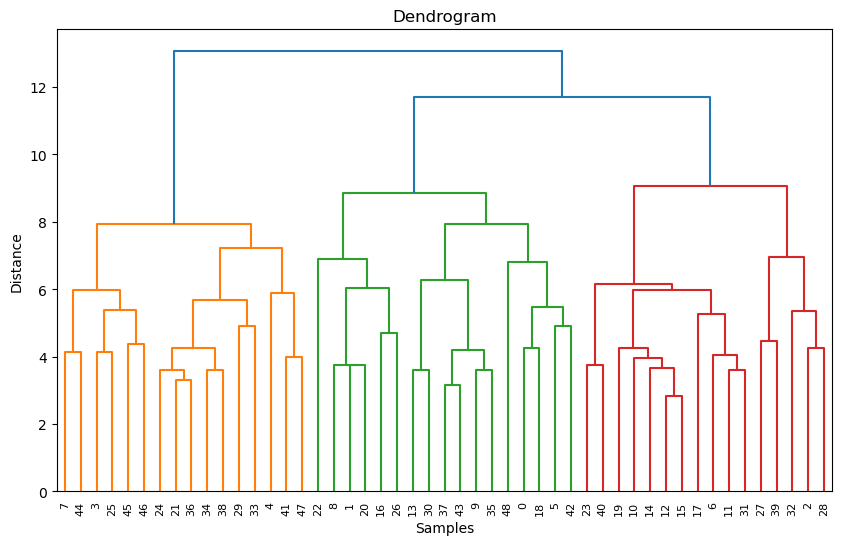

In [66]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import joblib
# Assuming you have loaded your dataset into a DataFrame named 'h'
h = h.drop(["ROLE"], axis=1)

# Select all columns except the target variable for clustering
X = h

# Create an instance of the AgglomerativeClustering algorithm
hierarchical = AgglomerativeClustering(n_clusters=8)  # Specify the number of clusters

# Fit the hierarchical clustering model to the data
cluster_labels = hierarchical.fit_predict(X)

# Add the cluster labels to the original DataFrame
h['Cluster'] = cluster_labels

# Split the dataset into features (X) and target (y)
X = h.iloc[:, :-1]
y = role

# Perform clustering on the features and predict the 'ROLE' values
cluster_model = AgglomerativeClustering(n_clusters=8)  # Specify the number of clusters
predicted_roles = cluster_model.fit_predict(X)

# Save the clustering model
joblib.dump(hierarchical, 'Herarichal_clustering_model.pkl')

# Compute the linkage matrix
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


In [67]:
h

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,Cluster
0,2,3,2,3,1,1,1,1,2,4,...,1,3,1,2,2,4,3,4,5,4
1,3,1,2,2,2,1,1,3,2,4,...,2,3,2,3,2,5,3,3,4,1
2,3,4,2,2,1,1,1,2,3,3,...,1,4,3,1,4,3,3,3,4,0
3,3,4,2,1,1,1,1,1,3,2,...,1,3,2,1,2,1,4,4,3,5
4,2,3,2,4,1,1,1,4,3,3,...,1,2,1,3,1,5,4,3,1,6
5,1,1,1,1,1,1,2,2,3,2,...,1,3,2,1,2,5,3,3,5,4
6,3,3,2,2,2,1,2,4,3,3,...,1,3,2,1,1,5,4,4,4,3
7,3,3,2,2,1,1,2,1,2,2,...,1,3,3,3,4,5,4,3,3,5
8,3,2,3,3,1,1,1,2,3,5,...,1,3,3,3,2,5,4,3,3,1
9,4,4,2,2,1,1,2,2,3,3,...,1,1,2,2,3,5,4,4,5,2


In [68]:
h["ROLE"]=role

In [69]:
import pandas as pd
import numpy as np

# Copy the original DataFrame
df_copy = h.copy()

# Group the data by the 'ROLE' column and find the most frequent cluster label for each role
grouped = df_copy.groupby('ROLE')['Cluster'].agg(lambda x: np.bincount(x).argmax())

# Create a new DataFrame with unique roles and their corresponding most frequent cluster
new_df = pd.DataFrame({'ROLE': grouped.index, 'Cluster': grouped.values})

# Print the new DataFrame
print(new_df)


                 ROLE  Cluster
0    Business Analyst        7
1        Data Analyst        6
2  Software Developer        3
3     Software Tester        2
4   Technical Support        5
5    Technical Writer        1
6      UI/UX Designer        0
7       Web Developer        3


In [70]:
# import joblib
import numpy as np
import joblib
# Load the KMeans model from file
hierarchical = joblib.load('Herarichal_clustering_model.pkl')
# Load the MinMaxScaler from file
# Take user input
sslc = int(input('SSLC is a secondary level certificate exam. so enter your grades 1:A, 2:B, 3:C, 4:D '))
hsc = int(input('HSC is a higher secondary certificate exam. so enter your grades 1:A, 2:B, 3:C, 4:D '))
cgpa = float(input('Enter CGPA (out of 4): '))
school_type = int(input('Enter school type (0 for matriculation, 1 for CBSE, 2 for ICSE): '))
no_of_miniprojects = int(input('Enter number of mini-projects: '))
no_of_projects = int(input('Enter number of projects: '))
coresub_skill = int(input('Enter core-subject skill level (out of 2): '))
aptitude_skill = int(input('Enter aptitude skill level (out of 5): '))
problemsolving_skill = int(input('Enter problem-solving skill level (out of 5): '))
programming_skill = int(input('Enter programming skill level (out of 5): '))
abstractthink_skill = int(input('Enter abstract thinking skill level (out of 5): '))
#design_skill = int(input('Enter design skill level (out of 5): '))
first_computer = int(input('Enter age when you used  your first  computer: '))
first_program = int(input('Enter age whenn you writw your first 2program: '))
lab_programs = int(input('Enter number of lab programs done: '))
ds_coding = int(input('Enter experience in data structures and coding (in months): '))
technology_used = int(input('Enter experience in using new technologies (in months): '))
sympos_attend = int(input('Enter number of symposiums attended: '))
sympos_won = int(input('Enter number of symposiums won: '))
extracurricular = int(input('Enter number of extracurricular activities participated in: '))
learning_style = int(input('Enter learning style (0 for visual, 1 for auditory, 2 for kinesthetic): '))
college_bench = int(input('Enter college bench percentage (out of 5): '))
clg_teachers_know = int(input('Enter how well college teachers know the student (out of 5): '))
college_performence = int(input('Enter college performance score (out of 5): '))
college_skills = int(input('Enter college skills score (out of 5): '))
college_performence = int(input('Enter college performance score (out of 5): '))
# # Create a numpy array from the user input values
user_input = np.array([ sslc, cgpa, school_type, no_of_miniprojects, no_of_projects, coresub_skill, aptitude_skill, problemsolving_skill, programming_skill, abstractthink_skill, first_computer, first_program, lab_programs, ds_coding, technology_used, sympos_attend, sympos_won, extracurricular, learning_style, college_bench, clg_teachers_know, college_performence, college_skills])
# # localtest=[3,1,2,2,5,1,1,2,2,2,3,5,1,3,1,2,2,1,2,3,2,5,3,3,2]


SSLC is a secondary level certificate exam. so enter your grades 1:A, 2:B, 3:C, 4:D 1
HSC is a higher secondary certificate exam. so enter your grades 1:A, 2:B, 3:C, 4:D 1
Enter CGPA (out of 4): 1
Enter school type (0 for matriculation, 1 for CBSE, 2 for ICSE): 1
Enter number of mini-projects: 1
Enter number of projects: 1
Enter core-subject skill level (out of 2): 1
Enter aptitude skill level (out of 5): 1
Enter problem-solving skill level (out of 5): 1
Enter programming skill level (out of 5): 1
Enter abstract thinking skill level (out of 5): 1
Enter age when you used  your first  computer: 1
Enter age whenn you writw your first 2program: 1
Enter number of lab programs done: 1
Enter experience in data structures and coding (in months): 1
Enter experience in using new technologies (in months): 1
Enter number of symposiums attended: 1
Enter number of symposiums won: 1
Enter number of extracurricular activities participated in: 1
Enter learning style (0 for visual, 1 for auditory, 2 for

In [120]:
import numpy as np
import joblib

# Load the hierarchical clustering model
hierarchical = joblib.load('Herarichal_clustering_model.pkl')


# Convert input values to a NumPy array
input_array = np.array(user_input).reshape(-1, 1)

# Predict the cluster number
predicted_cluster = hierarchical.fit_predict(input_array)

# Print the predicted cluster number
print("Predicted cluster number:", predicted_cluster)


Predicted cluster number: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 6 5 4 3 2 1]


In [121]:

# Convert input values to a NumPy array
input_array = np.array(user_input).reshape(-1,1)

# Predict the cluster labels for each sample
predicted_clusters = hierarchical.fit_predict(input_array)

# Select the most frequent cluster label
predicted_cluster = np.argmax(np.bincount(predicted_clusters))

# Print the predicted cluster number
print("Predicted cluster number:", predicted_cluster)


Predicted cluster number: 0
